# BTC Price Prediction (Preprocessing and Training)

### This notebook contains:
- Use of "Standard Scaler" to ensure values are to scale for modeling (no large fluctuations), preventing leakage
- Splitting of dataframe into "testing" and "training" subsets using "TimeSeriesSplit()" 
- Overall preprocessing to prep for modeling and implementation of various classifying/tree based methods
- Two baseline linear regression models using "Ordinary Least Squares(OLS)"

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
import statsmodels.api as sm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/train.csv', index_col='Date')

In [3]:
df.head()

,close,volume,ema_short,ema_long,atr,obv,tweet_sentiment,close_nextday
Date,,,,,,,,
2019-09-02,10340.00,44740.25,10164.518939,10452.265343,530.693553,225053.863244,-1.0,10615.28
2019-09-03,10615.28,47998.38,10207.448563,10458.658074,528.572585,273052.240025,0.5,10567.02
2019-09-04,10567.02,43943.89,10241.693462,10462.907561,521.468114,229108.350999,0.5,10564.49
2019-09-05,10564.49,33970.96,10272.435990,10466.891187,516.363249,195137.390360,0.5,10298.73
2019-09-06,10298.73,58799.64,10274.940181,10460.296630,533.470874,136337.749401,0.0,10455.88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 2019-09-02 to 2020-11-15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   close            441 non-null    float64
 1   volume           441 non-null    float64
 2   ema_short        441 non-null    float64
 3   ema_long         441 non-null    float64
 4   atr              441 non-null    float64
 5   obv              441 non-null    float64
 6   tweet_sentiment  441 non-null    float64
 7   close_nextday    441 non-null    float64
dtypes: float64(8)
memory usage: 31.0+ KB


In [5]:
print(df.shape)

(441, 8)


### Dataframe split (training and testing)

In [6]:
X = df.drop(labels=['close_nextday'], axis=1)
y = df['close_nextday']

print(X.head(5))

               close    volume     ema_short      ema_long         atr  \
Date                                                                     
2019-09-02  10340.00  44740.25  10164.518939  10452.265343  530.693553   
2019-09-03  10615.28  47998.38  10207.448563  10458.658074  528.572585   
2019-09-04  10567.02  43943.89  10241.693462  10462.907561  521.468114   
2019-09-05  10564.49  33970.96  10272.435990  10466.891187  516.363249   
2019-09-06  10298.73  58799.64  10274.940181  10460.296630  533.470874   

                      obv  tweet_sentiment  
Date                                        
2019-09-02  225053.863244             -1.0  
2019-09-03  273052.240025              0.5  
2019-09-04  229108.350999              0.5  
2019-09-05  195137.390360              0.5  
2019-09-06  136337.749401              0.0  


#### Split time series... 70% train data = 70% first months/days of data , 30% test = last 30% of data

In [7]:
tss = TimeSeriesSplit(n_splits = 3) # n_splits = 3-1...2 splits

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [8]:
print("X:\n", X_test, X_test.shape, X_train, X_train.shape)

X:
                close     volume     ema_short      ema_long         atr  \
Date                                                                      
2020-07-29  11100.53   76838.09   9826.875579   9490.443365  354.371960   
2020-07-30  11099.61   60794.83   9948.088381   9553.547939  353.273963   
2020-07-31  11335.46   70063.66  10080.219011   9623.426844  362.611537   
2020-08-01  11801.17   85087.49  10244.119106   9708.828536  382.496427   
2020-08-02  11071.35   97553.08  10322.903000   9762.260750  469.815254   
...              ...        ...           ...           ...         ...   
2020-11-11  15684.24   78469.75  14236.176564  12927.689795  698.560946   
2020-11-12  16291.86  102196.36  14431.955939  13059.618039  712.953736   
2020-11-13  16320.70   75691.88  14611.836326  13187.503606  699.717755   
2020-11-14  16070.45   59116.35  14750.751914  13300.560327  696.665772   
2020-11-15  15957.00   43596.84  14865.632684  13404.734432  675.852503   

                    

In [9]:
print("y:\n", y_test, y_test.shape, y_train, y_train.shape)

y:
 Date
2020-07-29    11099.61
2020-07-30    11335.46
2020-07-31    11801.17
2020-08-01    11071.35
2020-08-02    11219.81
                ...   
2020-11-11    16291.86
2020-11-12    16320.70
2020-11-13    16070.45
2020-11-14    15957.00
2020-11-15    16713.57
Name: close_nextday, Length: 110, dtype: float64 (110,) Date
2019-09-02    10615.28
2019-09-03    10567.02
2019-09-04    10564.49
2019-09-05    10298.73
2019-09-06    10455.88
                ...   
2020-07-24     9700.42
2020-07-25     9931.54
2020-07-26    11029.96
2020-07-27    10906.27
2020-07-28    11100.53
Name: close_nextday, Length: 331, dtype: float64 (331,)


In [10]:
# Reshape y train, test to match X train, test

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

### Scaling the dataframe

In [11]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
y_train = ss.fit_transform(y_train)
y_test = ss.fit_transform(y_test)

In [12]:
print("X Train:", X_train, type(X_train), X_train.shape, len(X_train)) #TrainX
print("\nX Test:", X_test, type(X_test), X_test.shape, len(X_test)) #TestX
print("\ny Train:", y_train, type(y_train), y_train.shape, len(y_train)) #Trainy
print("\ny Test:", y_test, type(y_test), y_test.shape, len(y_test)) #Testy

X Train: [[ 1.49929341 -0.40861044  1.57803412 ...  0.9507744   0.17831782
  -1.97717629]
 [ 1.72641589 -0.33062537  1.61962818 ...  0.93249884  0.27043599
   0.28715395]
 [ 1.6865985  -0.42767174  1.6528077  ...  0.87128236  0.18609916
   0.28715395]
 ...
 [ 1.16228946  0.08300193  0.84783662 ... -1.67914193  1.76168372
  -0.4676228 ]
 [ 2.06855171  2.11535981  0.99723798 ... -0.90846523  2.04992536
  -0.0363218 ]
 [ 1.96650006  0.84866273  1.12099711 ... -0.68547326  1.86324975
  -0.4676228 ]] <class 'numpy.ndarray'> (331, 7) 331

X Test: [[-5.17734398e-01  7.16505404e-01 -1.52157983e+00 -1.97583424e+00
  -8.87472861e-01 -1.17561486e+00 -6.21452070e-01]
 [-5.18323922e-01  1.37310157e-02 -1.40876707e+00 -1.89442626e+00
  -8.98313120e-01 -1.40310289e+00 -6.21452070e-01]
 [-3.67194292e-01  4.19751758e-01 -1.28579309e+00 -1.80427906e+00
  -8.06125517e-01 -1.14093183e+00  1.30515610e+00]
 [-6.87733460e-02  1.07787005e+00 -1.13325127e+00 -1.69410671e+00
  -6.09806823e-01 -8.22543161e-01  5

   2.28642650e+00  2.00526004e+00  1.30515610e+00]] <class 'numpy.ndarray'> (110, 7) 110

y Train: [[ 1.71862644e+00]
 [ 1.67894513e+00]
 [ 1.67686486e+00]
 [ 1.45834633e+00]
 [ 1.58756136e+00]
 [ 1.52614003e+00]
 [ 1.46195596e+00]
 [ 1.29342140e+00]
 [ 1.34290381e+00]
 [ 1.55395641e+00]
 [ 1.49397399e+00]
 [ 1.48818542e+00]
 [ 1.46104328e+00]
 [ 1.41935570e+00]
 [ 1.36715168e+00]
 [ 1.34180201e+00]
 [ 1.41358358e+00]
 [ 1.35134000e+00]
 [ 1.20152785e+00]
 [ 1.23645661e+00]
 [ 9.67896537e-01]
 [-2.62822225e-02]
 [-7.81573521e-02]
 [-3.79360355e-01]
 [-2.85476978e-01]
 [-2.68292159e-01]
 [-3.95731156e-01]
 [-1.93854760e-01]
 [-1.91305816e-01]
 [-1.35804607e-01]
 [-2.47612820e-01]
 [-3.19007930e-01]
 [-3.28003237e-01]
 [-5.51603217e-01]
 [-2.75462093e-01]
 [-2.93304704e-01]
 [ 2.93012101e-02]
 [ 2.70729393e-02]
 [-2.19212646e-01]
 [-1.85015679e-01]
 [-2.05637461e-01]
 [-1.45457707e-01]
 [-3.00787089e-01]
 [-4.38553422e-01]
 [-3.73728011e-01]
 [-4.75332223e-01]
 [-4.74509983e-01]
 [-2.481

#### Multiple Linear Regression Using OLS (Ordinary Least Squares)

In [13]:
lr = sm.OLS(y_train, X_train)

results = lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              627.6
Date:                Sun, 03 Jan 2021   Prob (F-statistic):                   3.22e-184
Time:                        15:33:20   Log-Likelihood:                         -26.421
No. Observations:                 331   AIC:                                      66.84
Df Residuals:                     324   BIC:                                      93.46
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9412      0.037     25.480      0.000       0.869       1.014
x2            -0.0060      0.020     -0.307      0.759      -0.045       0.033
x3             0.0293      0.063      0.463      0.644      -0.095       0.154
x4            -0.0337      0.044     -0.761      0.447      -0.121       0.053
x5            -0.0118      0.019     -0.613      0.540      -0.050       0.026
x6             0.0268      0.017      1.555      0.121      -0.007       0.061
x7             0.0110      0.015      0.736      0.462      -0.018       0.040
==============================================================================
Omnibus:                      247.929   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11304.259
Skew:                          -2.530   Prob(JB):                         0.00
Kurtosis:                      31.179   Cond. No.                         9.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary results, we can see that the Adj. R-Squared was 0.930. This shows us that the model explains it variability fairly well. However, this metric solely does not explain the overall performance of the model but it does show us that our predictors are on the right track

In [14]:
y_pred = results.predict(X_test)

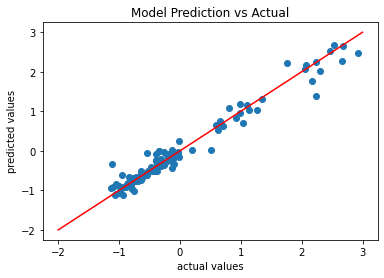

In [15]:
_ = plt.scatter(y_test, y_pred)
_ = plt.plot([x for x in range(-2, 4)], [y for y in range(-2, 4)], color='red')

_ = plt.title('Model Prediction vs Actual')
_ = plt.xlabel('actual values')
_ = plt.ylabel('predicted values')
plt.show()

In [16]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Results of sklearn.metrics:\n")
print("MAPE:", mape)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results of sklearn.metrics:

MAPE: 354.1403284538511
MAE: 0.133600128054328
MSE: 0.039677913740618104
RMSE: 0.1991931568619216


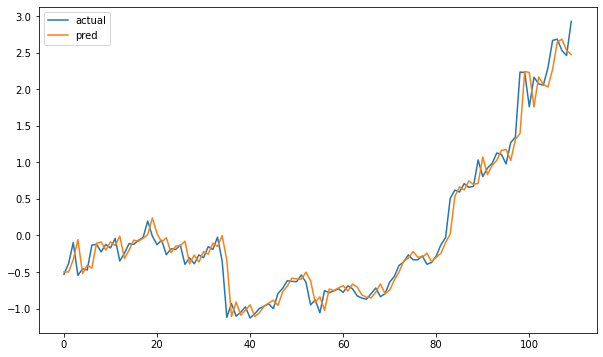

In [18]:
_ = plt.figure(figsize=(10, 6))
_ = plt.plot(y_test)
_ = plt.plot(y_pred)
_ = plt.legend(["actual", "pred"])
plt.show()

#### Avoiding redundancy in linear regression models

Since the feature "close" is already found to be correlated with our prediction of "close_nextday" (from heatmap EDA stage), we can remove "close" to see how disposable it really is in relation to the model.

In [19]:
# Pull in correlation data gathered from EDA correlation heatmap

f = open('data/highest_corr_target.txt', 'r')
file_contents = f.read()
print('Highest correlated variable with target:\n', "\n", file_contents)

Highest correlated variable with target:
 
 close  close_nextday    0.986686
dtype: float64
print(c2)print('Highest Correlated Variable:', c2)print(c2)


### Dataframe split (training and testing)

In [20]:
X2 = df.drop(labels=['close_nextday', 'close'], axis=1)
y2 = df['close_nextday']

print(X2.head(5))

              volume     ema_short      ema_long         atr            obv  \
Date                                                                          
2019-09-02  44740.25  10164.518939  10452.265343  530.693553  225053.863244   
2019-09-03  47998.38  10207.448563  10458.658074  528.572585  273052.240025   
2019-09-04  43943.89  10241.693462  10462.907561  521.468114  229108.350999   
2019-09-05  33970.96  10272.435990  10466.891187  516.363249  195137.390360   
2019-09-06  58799.64  10274.940181  10460.296630  533.470874  136337.749401   

            tweet_sentiment  
Date                         
2019-09-02             -1.0  
2019-09-03              0.5  
2019-09-04              0.5  
2019-09-05              0.5  
2019-09-06              0.0  


#### Split time series... 70% train data = 70% first months/days of data , 30% test = last 30% of data

In [21]:
tss = TimeSeriesSplit(n_splits = 3)

for train_index, test_index in tss.split(X2):
    X2_train, X2_test = X2.iloc[train_index, :], X2.iloc[test_index,:]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

In [22]:
# Reshape y train, test to match X train, test

y2_train = y2_train.values.reshape(-1,1)
y2_test = y2_test.values.reshape(-1,1)

### Scaling the dataframe

In [23]:
ss = StandardScaler()

X2_train = ss.fit_transform(X2_train)
X2_test = ss.fit_transform(X2_test)
y2_train = ss.fit_transform(y2_train)
y2_test = ss.fit_transform(y2_test)

In [24]:
lr2 = sm.OLS(y2_train, X2_train)

results2 = lr2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              208.4
Date:                Sun, 03 Jan 2021   Prob (F-statistic):                   3.46e-108
Time:                        15:38:08   Log-Likelihood:                         -208.45
No. Observations:                 331   AIC:                                      428.9
Df Residuals:                     325   BIC:                                      451.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1141      0.033     -3.438      0.001      -0.179      -0.049
x2             1.2756      0.070     18.319      0.000       1.139       1.413
x3            -0.6110      0.066     -9.297      0.000      -0.740      -0.482
x4            -0.0426      0.033     -1.277      0.203      -0.108       0.023
x5             0.1383      0.029      4.796      0.000       0.082       0.195
x6             0.0217      0.026      0.839      0.402      -0.029       0.072
==============================================================================
Omnibus:                       57.835   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.132
Skew:                          -0.498   Prob(JB):                     5.73e-82
Kurtosis:                       8.112   Cond. No.                         5.80
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This time the results of our summary statistics give us an Adj. R-squared measure of 0.790. This was an expected drop from our last model as we removed one of our predictors ("close"), which is a highly correlated variable to the target. 

In [25]:
y2_pred = results2.predict(X2_test)

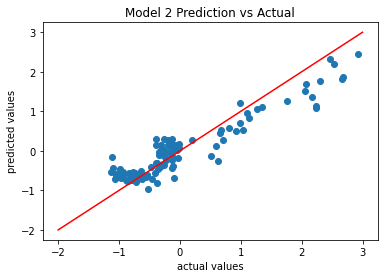

In [26]:
_ = plt.scatter(y2_test, y2_pred)
_ = plt.plot([x for x in range(-2, 4)], [y for y in range(-2, 4)], color='red')

_ = plt.title('Model 2 Prediction vs Actual')
_ = plt.xlabel('actual values')
_ = plt.ylabel('predicted values')
plt.show()

In [27]:
def mean_absolute_percentage_error(y2_test, y2_pred):
    y2_test, y2_pred = np.array(y2_test), np.array(y2_pred)
    return np.mean(np.abs((y2_test - y2_pred) / y2_test)) * 100

In [29]:
mape2 = mean_absolute_percentage_error(y2_test, y2_pred)
mae2 = metrics.mean_absolute_error(y2_test, y2_pred)
mse2 = metrics.mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse)

print("Results of sklearn.metrics:\n")
print("MAPE:", mape2)
print("MAE:", mae2)
print("MSE:", mse2)
print("RMSE:", rmse2)

Results of sklearn.metrics:

MAPE: 304.587998861751
MAE: 0.29408406499075357
MSE: 0.14443887286450433
RMSE: 0.1991931568619216


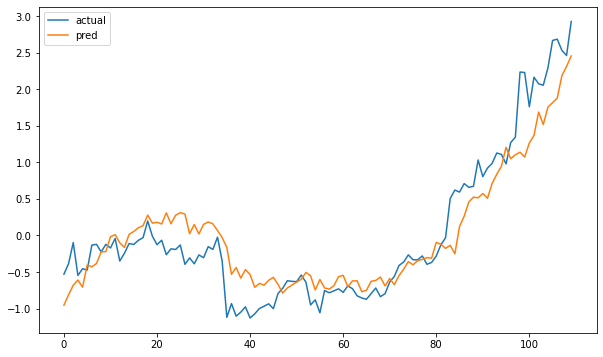

In [30]:
_ = plt.figure(figsize=(10, 6))
_ = plt.plot(y2_test)
_ = plt.plot(y2_pred)
_ = plt.legend(["actual", "pred"])
plt.show()

## Initial Findings and Conclusion

During this stage (preprocessing and training), we started by splitting the dataframe into two separate ones, training and testing using _TimeSeriesSplit()_. By using _TimeSeriesSplit()_ we are able to split the original dataframe in an ordered time-series way. The train portion is the first 70% of linear data and the test portion is the last 30% of linear data. From there we scaled the train/test splits which standardizes the magnitude of numeric features within our original dataframe, using _StandardScaler()_. This function allows us to normalize the features of each column(X), individually, so that each column/feature/variable will have a mean of 0 and standard deviation of 1.  From there we created a baseline for our predictions or future models by utilizing two simple multi linear regression models using ordinary least squares(OLS). 

One iteration of our linear regression model, for X contained all available features, aside from the target(y). While the other one for X contained all features except the target and "close", with the target(y) remaining the same. We then calculated the _MAPE_, _MAE_, and _MSE_ for each. By comparison, the first linear regression model performed worse as the mean absolute percent error was roughly 354%, meaning the errors are "much greater" than the actual values. Whereas the second linear regression model gave us an _MAPE_ of roughly 304%, meaning our errors of that model were "slightly greater" than the actual values. This difference in _MAPE_ can be seen as well when comparing _RMSE_ results to _MAE_ results for each model. We can see the first model gave an _RMSE_ output of approx. 0.1999 and an _MAE_ output of approx. 0.1333. Since the two measurements are relatively close to each other it can be implied that the model makes many mistakes, but the mistakes are "small". The same can be said for the other model but opposite when comparing metrics. 

That being said, we can see that the feature "close" is fairly important when being utilized in a regression model. As when it was removed, the performance of the model decreased. However, by including the "close" price we might assume that it causes the model to be overfit. Because of these brief findings, we have further confirmed the original "hypothesis" formed during the EDA stage in exploring the high correlation between "close_nextday" and "close".

During the next stage (modeling), we will be examining other model architecture such as ensemble methods through "trees", i.e. random forest regressors(RFR). We will be improving or tuning our different models using optimization methods like _GridSearchCV_. Moreover, optimization will also aid us in the analysis of features (i.e. feature "impact" or "importance") as well as interpretability as a whole. 